# Recurrent Neural Network using Numpy (Practice and for base concept Only)  
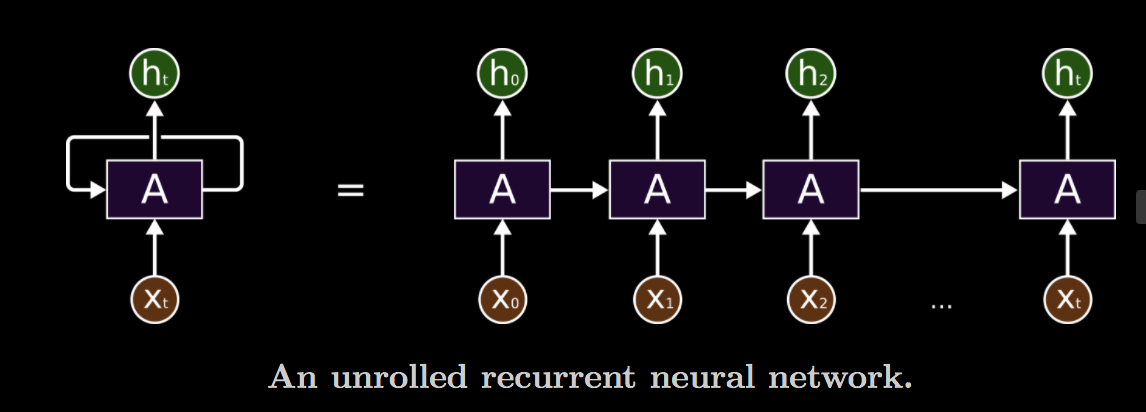 

### ***Definition**: A recurrent neural network (RNN) is a type of artificial neural network that processes sequential data. RNNs are used to model data like speech, text, and time series.*
- vocab = ["I", "eat", "Cake"] # Example input sentence 
- convert into a vector representation 
- Vectors stored into **x1,x2,x3**
- Initiate weights "Manually"  
- input to hidden *wxh* 
- hidden to hidden *whh* 
- hidden to output *why* 
- hidden and output biases *bh* and *by*

In [236]:
import numpy as np # Numpy
vocab = ["I", "eat", "Cake"] # Example input sentence
 
# convert into a vector representation
vocab[0] = [1, 0, 0]
vocab[1] = [0, 1, 0] 
vocab[2] = [0, 0, 1] 
 
# Vectors stored into x1,x2,x3 array
x1 = np.array(vocab[0])
x2 = np.array(vocab[1]) 
x3 = np.array(vocab[2])    
 
# Initiate weights "Manually"
wxh = np.array([[1., 0.1, -0.3],   # input to hidden
                [-0.2, 1., 1.]])
 
 
whh = np.array([[0.6, 0.2],         # hidden to hidden
                [0.1, 0.7]]) 


why = np.array([[0.3, 0.5],         # hidden to output
                [-0.1, 0.2], 
                [0.4, 0.7]]) 


bh = np.array([0.1, 0.2])           # hidden bias
   
by = np.array([0.1, 0.2, 0.3])      # output bias

print(f"The shape of input  to hidden  (wxh): {wxh.shape} Matrix") 
print(f"The shape of hidden to hidden (whh): {whh.shape} Matrix") 
print(f"The shape of hidden to Output (why): {why.shape} Matrix") 
print(f"The shape of hidden bias (bh):       {bh.shape} Matrix") 
print(f"The shape of Output bias (by):       {wxh.shape} Matrix")

The shape of input  to hidden  (wxh): (2, 3) Matrix
The shape of hidden to hidden (whh): (2, 2) Matrix
The shape of hidden to Output (why): (3, 2) Matrix
The shape of hidden bias (bh):       (2,) Matrix
The shape of Output bias (by):       (2, 3) Matrix


## Step by Step Guide of calculation 
- step 1: Initialize hidden state  
- step 2: Proceed for input -> x1 [1 0 0]  
- step 3: Preceed for input -> x2 [0 1 0]  
- step 4: Output Prediction Yout 

_______
 
### Steps to print the vectors (optional): 
- Convert to NumPy arrays if they are lists. 
- Iterate over h1 
- Iterate over h2
- Iterate over Yout  
- Display vectors after training


In [239]:
# step 1: Initialize hidden state  
h0 = np.array([0,0])  
 
# step 2: Proceed for input -> x1 [1 0 0]
wxh_x1 = np.dot(wxh,x1) 
whh_h0 = np.dot(whh,h0) 
h1 = np.tanh(wxh_x1 + whh_h0 + bh)
print("The Prediction of h1 is: ",h1)
  
# step 3: Preceed for input -> x2 [0 1 0] 
wxh_x2 = np.dot(wxh,x2) 
whh_h1 = np.dot(whh,h1) 
h2 = np.tanh(wxh_x2 + whh_h1 + bh) 
print("The Prediction of h2 is: ",h2)

# step 4: Output Prediction 
Yout = np.dot(why,h2) + by   
print("The Prediction of Yout is: ",Yout)

# Convert to NumPy arrays if they are lists
h1 = np.array(h1) 
h2 = np.array(h2)
Yout = np.array(Yout)
 
 
  
# Steps to print Vectors
Vector1, Vector2, Vector3 = [], [], []
# Iterate over h1
for i in range(len(h1)):   
    if h1[i] == np.max(h1):  # Use np.max() for getting the maximum value
        Vector1.append(1) 
    else: 
        Vector1.append(0)

# Iterate over h2
for i in range(len(h2)):   
    if h2[i] == np.max(h2):  # Use np.max() for getting the maximum value
        Vector2.append(1) 
    else: 
        Vector2.append(0)

# Iterate over Yout
for i in range(len(Yout)):   
    if Yout[i] == np.max(Yout):  # Use np.max() for getting the maximum value
        Vector3.append(1) 
    else: 
        Vector3.append(0)



    
# Display vectors after training
print() 
print("The vectors after training")
print(Vector1) 
print(Vector2)
print(Vector3)

     
       


The Prediction of h1 is:  [0.80049902 0.        ]
The Prediction of h2 is:  [0.59171401 0.85649821]
The Prediction of Yout is:  [0.70576331 0.31212824 1.13623435]
[1, 0]
[0, 1]
[0, 0, 1]


### Final Output: apply softmax on the Output vector Yout 
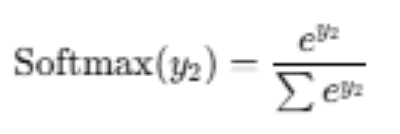
  
### Steps:
- finding ey2 
- Applying softmax on Yout 
- Probabilities of prediction
- logic to convert prediction into vector representation 
- Print the whole prediction with predictive vector

In [240]:
# finding ey2 
Exponencial_Yout = []  
for i in range(len(Yout)):
   e = np.exp(Yout[i])
   Exponencial_Yout.append(e)  
 
 
# Applying softmax on Yout
predictions = [] 
for i in range(len(Exponencial_Yout)): 
    softmax = Exponencial_Yout[i] / np.sum(Exponencial_Yout)
    predictions.append(softmax) 
 
# Probabilities of predictions
predictions = np.array(predictions) 
print("The final predictions after SOFTMAX is") 
print(predictions) 
 
  
# logic to convert prediction to vector representation
predicted_vector = []    
for i in range(len(predictions)): 
    if predictions[i] == max(predictions): 
        predicted_vector.append(1)    
    else:  
        predicted_vector.append(0)   
    
  
# Print the whole predcition with predictive vector
print()
print("When the input is  (I Eat) ....")
print("The predicted Vector is: ", predicted_vector,"--> Cake") 
print("The resultant prediction I eat -->[Cake: [0 0 1]]")


The final predictions after SOFTMAX is
[0.3112761  0.20998692 0.47873698]

When the input is  (I Eat) ....
The predicted Vector is:  [0, 0, 1] --> Cake
The resultant prediction I eat -->[Cake: [0 0 1]]


## *Detailed overview:*
### ***The input data and vector representations***
The input sentence: "I eat Cake". Three words, three timestamps
The model trained on three vectors started from timestamps (t = 0, t = 1, t = 2). 
  - **x1: [1   0   0]**  *vector representation of -> **["I"]**  ---> t = 0*
  - **x2: [0   1   0]**  *vector representation of -> **["eat"]** ---> t = 1*
  - **x3: [0   0   1]**  *vector representation of -> **["Cake"]**  --->t = 2*
 
### ***Understanding the Logic*** 
The logic and rule behind vectors:  
- 1 for high *Probability*. 
- 0 for low *Probability*. 

### ***Example-1.1:*** Example probabilities.  
*by using 1 and 0 logic*
 - [0.31]  --->low means 0 
 - [0.20] --->low means 0 
 - [0.47] --->high means 1
   
### ***Conclusion:***  
Resultant vector or predicted_vector will become: [0 0 1]. At the end, training from ***(t=0, t=1, and **UPTO** t=3).  
**Which Means**: According to the predicted_vector if the input is ("I" "eat") ***THEN*** the predicted word should be a "cake". We already proved that the vector representation of the ["cake": [0 0 1]]. *As already discuss in **Example-1.1** the logic and representation of the data.